In [1]:
# Step 0: Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load your McDonald's customer data (replace with actual filename)
df = pd.read_csv("mcdonalds.csv")  # <-- Replace with your file

# View structure
print(df.shape)
print(df.info())
df.head()

(1453, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB
None


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [37]:
# Identify columns with "Yes"/"No" responses
binary_cols = df.columns[(df == 'Yes').any()]
df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if x == 'Yes' else 0)

In [39]:
# Select only numeric columns (now includes binary-converted ones)
X = df.select_dtypes(include=np.number)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [41]:
# Check for missing values
print(df.isnull().sum())

# Describe data
df.describe()


yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,44.604955
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,14.221178
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,45.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,57.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,71.000000


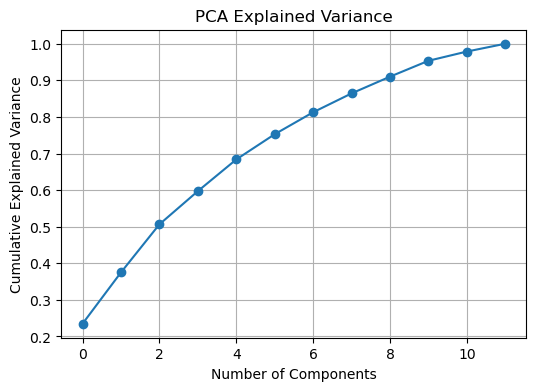

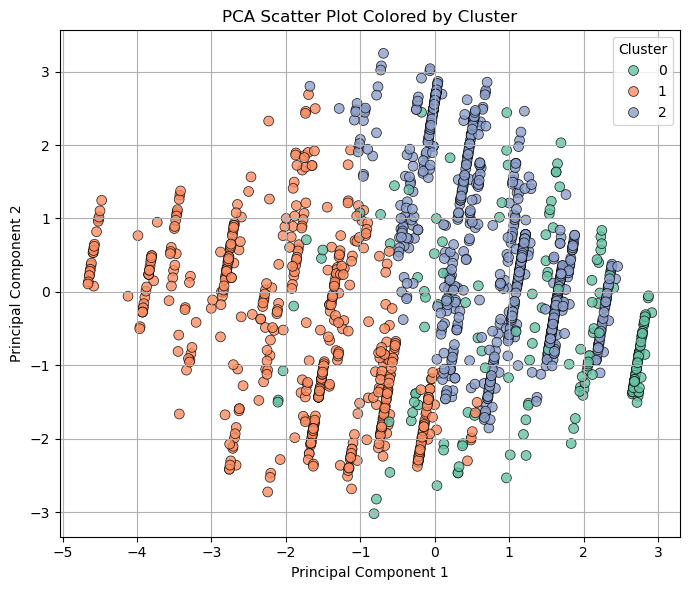

In [65]:
# Run PCA and visualize explained variance
pca = PCA()
pca_components = pca.fit_transform(X_scaled)

plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid(True)
plt.show()



# Reduce to 2D for visualization
X_pca = PCA(n_components=2).fit_transform(X_scaled)



# Scatter plot of PCA components colored by cluster
plt.figure(figsize=(7, 6))

# Color by cluster labels
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=df['Cluster'],
    palette='Set2',  # or 'tab10', 'husl', 'coolwarm', etc.
    s=50,
    edgecolor='black',
    alpha=0.8 
)

plt.title('PCA Scatter Plot Colored by Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


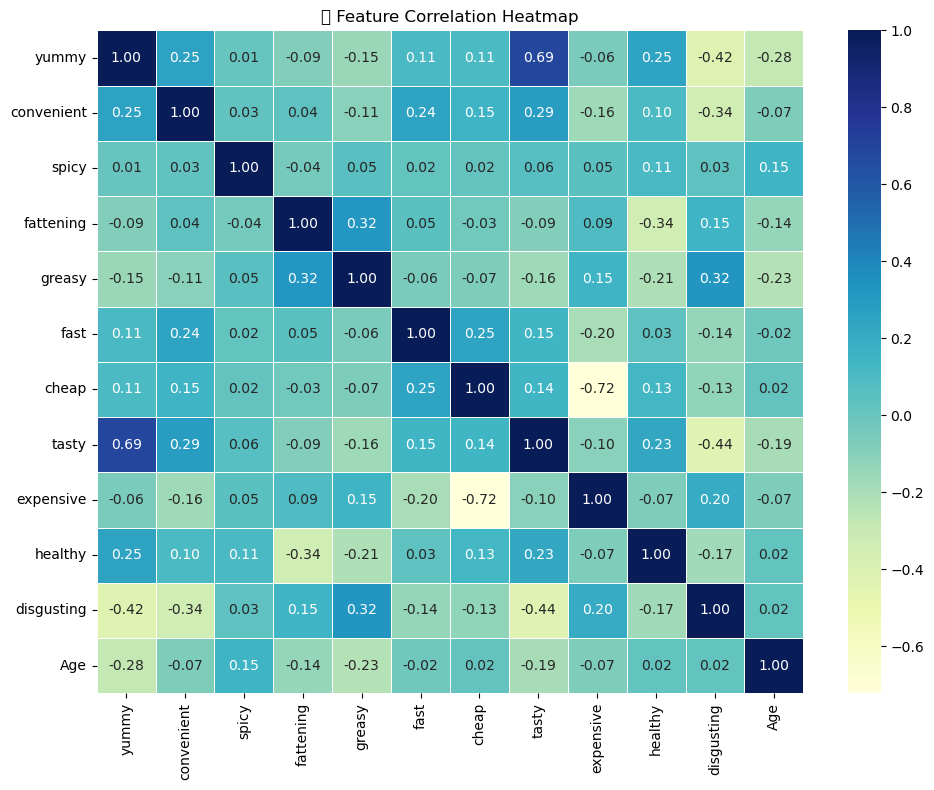

In [83]:
# Compute correlation matrix
correlation_matrix = df[profile_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='YlGnBu', linewidths=0.5)
plt.title("🔗 Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

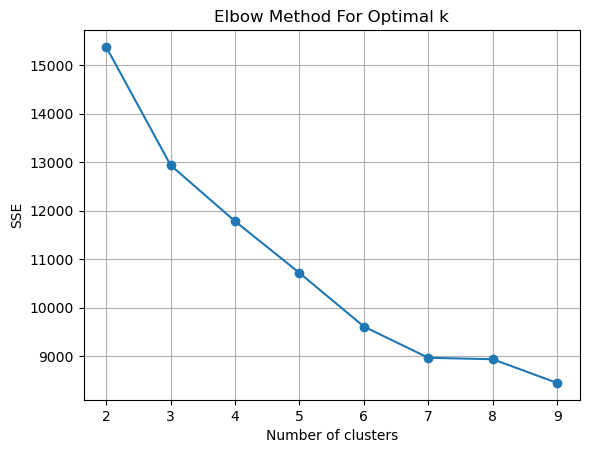

In [45]:
# Elbow method to determine optimal K
sse = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    sse.append(km.inertia_)

plt.plot(range(2, 10), sse, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("Elbow Method For Optimal k")
plt.grid(True)
plt.show()

# Choose and run KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

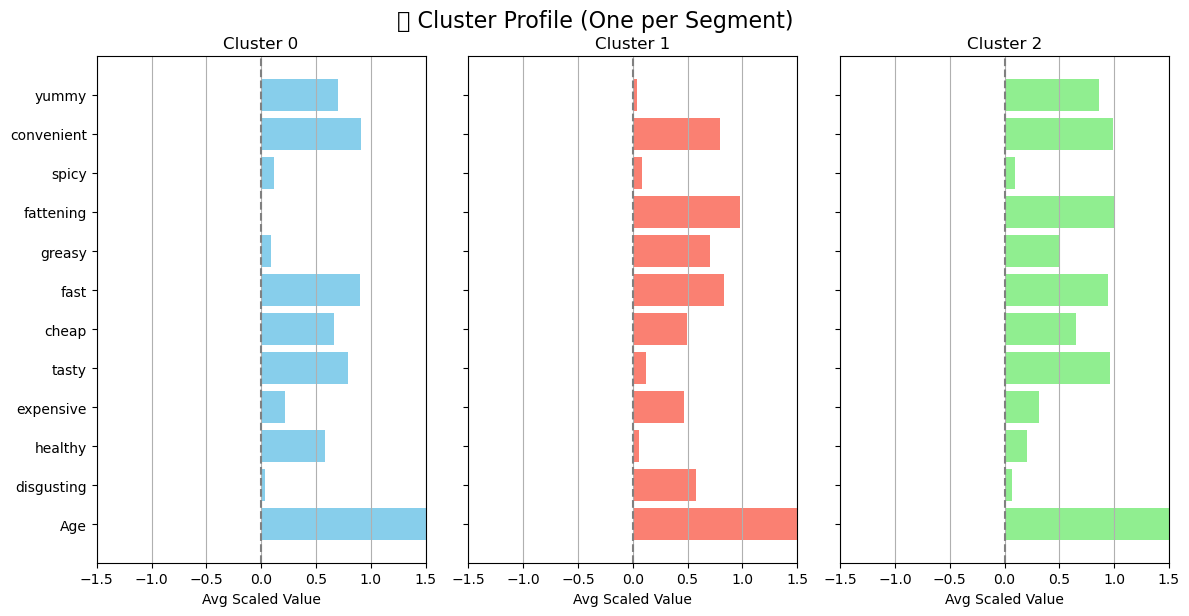

In [95]:
# Step 1: Compute the cluster summary (mean values for each feature)
numeric_cols = df.select_dtypes(include='number').columns
profile_cols = numeric_cols.drop('Cluster')  # Exclude 'Cluster' itself

cluster_summary = df.groupby('Cluster')[profile_cols].mean()

# Step 2: Transpose for better plotting (rows = features, columns = clusters)
Cluster_profile = cluster_summary.T

# Step 3: Set up the subplot grid
features = Cluster_profile.index
n_clusters = Cluster_profile.shape[1]  # Automatically adapts to your cluster count
colors = ['skyblue', 'salmon', 'lightgreen', 'plum', 'orange', 'purple']  # Add more if needed

fig, axes = plt.subplots(nrows=1, ncols=n_clusters, figsize=(4 * n_clusters, 6), sharey=True)

# Step 4: Create one horizontal bar plot per cluster
for i, cluster in enumerate(Cluster_profile.columns):
    ax = axes[i] if n_clusters > 1 else axes
    ax.barh(features, Cluster_profile[cluster], color=colors[i % len(colors)])
    ax.set_title(f'Cluster {cluster}')
    ax.set_xlabel('Avg Scaled Value')
    ax.axvline(x=0, color='gray', linestyle='--')
    ax.grid(True, axis='x')
    ax.set_xlim(-1.5, 1.5)  # Adjust if needed
    ax.invert_yaxis()  # Top features appear on top

plt.tight_layout()
plt.suptitle("📊 Cluster Profile (One per Segment)", fontsize=16, y=1.02)
plt.show()


In [97]:
print(cluster_summary)

            yummy  convenient     spicy  fattening    greasy      fast  \
Cluster                                                                  
0        0.701657    0.911602  0.121547   0.000000  0.088398  0.900552   
1        0.035156    0.791016  0.083984   0.976562  0.705078  0.832031   
2        0.865789    0.985526  0.093421   1.000000  0.510526  0.946053   

            cheap     tasty  expensive   healthy  disgusting        Age  
Cluster                                                                  
0        0.668508  0.795580   0.215470  0.580110    0.038674  49.972376  
1        0.490234  0.117188   0.470703  0.054688    0.574219  48.359375  
2        0.655263  0.963158   0.315789  0.205263    0.068421  40.797368  
